In [4]:
#x <- read.csv("Intervals_092014_012016.csv",colClasses = c("character","numeric","numeric","character"),header=TRUE)
library(data.table,lib.loc="../Rpackages")

In [5]:
x <- fread("Intervals_092014_072015.csv",header=TRUE,sep=",",na.strings="")

Read 55281458 rows and 5 (of 5) columns from 3.051 GB file in 00:00:47


In [6]:
summary(x)

 MR_MDVC_NUMBER       START_READ       END_READ        INTERVAL_TIME     
 Length:55281458    Min.   :    0   Min.   :    0.08   Length:55281458   
 Class :character   1st Qu.: 6106   1st Qu.: 6116.56   Class :character  
 Mode  :character   Median : 9763   Median : 9780.80   Mode  :character  
                    Mean   :11077   Mean   :11095.95                     
                    3rd Qu.:14412   3rd Qu.:14434.97                     
                    Max.   :99938   Max.   :99937.71                     
                    NA's   :1519                                         
 INTERVAL_READ   
 Min.   : 0.000  
 1st Qu.: 0.064  
 Median : 0.128  
 Mean   : 0.197  
 3rd Qu.: 0.239  
 Max.   :34.394  
 NA's   :19308   

In [7]:
str(x)

Classes 'data.table' and 'data.frame':	55281458 obs. of  5 variables:
 $ MR_MDVC_NUMBER: chr  "123053022" "123053022" "123053022" "123053022" ...
 $ START_READ    : num  8486 8486 8486 8486 8486 ...
 $ END_READ      : num  8498 8498 8498 8498 8498 ...
 $ INTERVAL_TIME : chr  "01-SEP-2014 00:15:00" "01-SEP-2014 00:30:00" "01-SEP-2014 00:45:00" "01-SEP-2014 01:00:00" ...
 $ INTERVAL_READ : num  0.148 0.101 0.141 0.231 0.262 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [8]:
#get 5 highest samples
tot = tapply(x$INTERVAL_READ, x$MR_MDVC_NUMBER, sum, na.rm=T)
qtot = quantile(tot,0:10/10);

o = order(-tot);
top = names(tot[o][1:5]);
x_top <- x[match(x$MR_MDVC_NUMBER, top, nomatch=0)>0,]

mid = names(tot[tot<qtot[6]&tot>=qtot[5]])[1:5];
x_mid <- x[match(x$MR_MDVC_NUMBER, mid, nomatch=0)>0,]

bot = names(tot[tot<qtot[3]&tot>=qtot[2]])[1:5];
x_bot <- x[match(x$MR_MDVC_NUMBER, bot, nomatch=0)>0,]

In [18]:
my_plot <- function(tmp_df, i, q){
    name <- paste(i,"_",q,"_full",".jpeg",sep="")
    jpeg(name)
    par(mfrow=c(4,2))
    plot(filter(tmp_df[tmp_df$MR_MDVC_NUMBER==i,]$INTERVAL_READ,c(1,2,3,4,5,4,3,2,1)/(25)),main=i)
    acf(tmp_df[tmp_df$MR_MDVC_NUMBER==i,]$INTERVAL_READ,lag=24*4,main=i,na.action=na.pass)
    acf(tmp_df[tmp_df$MR_MDVC_NUMBER==i,]$INTERVAL_READ,type="partial",lag=24*4,main=i,na.action=na.pass)
    acf(diff(tmp_df$INTERVAL_READ),main=i,na.action=na.pass)
    dev.off()
}

In [14]:
unique(x_bot$MR_MDVC_NUMBER)
for(i in unique(x_bot$MR_MDVC_NUMBER)){
    my_plot(x_bot,i,"bot_big")
    print(i)
}
unique(x_top$MR_MDVC_NUMBER)
for(i in unique(x_top$MR_MDVC_NUMBER)){
    my_plot(x_top,i,"top_big")
    print(i)
}
unique(x_mid$MR_MDVC_NUMBER)
for(i in unique(x_mid$MR_MDVC_NUMBER)){
    my_plot(x_mid,i,"mid_big")
    print(i)
}

[1] "123053025" "123053106" "123053137" "123053169" "123053053"

[1] "123053025"
[1] "123053106"
[1] "123053137"
[1] "123053169"
[1] "123053053"


[1] "123053036" "123053040" "123053916" "123054013" "123054329"

[1] "123053036"
[1] "123053040"
[1] "123053916"
[1] "123054013"
[1] "123054329"


[1] "123053028" "123053035" "123053089" "123053092" "123053103"

[1] "123053028"
[1] "123053035"
[1] "123053089"
[1] "123053092"
[1] "123053103"


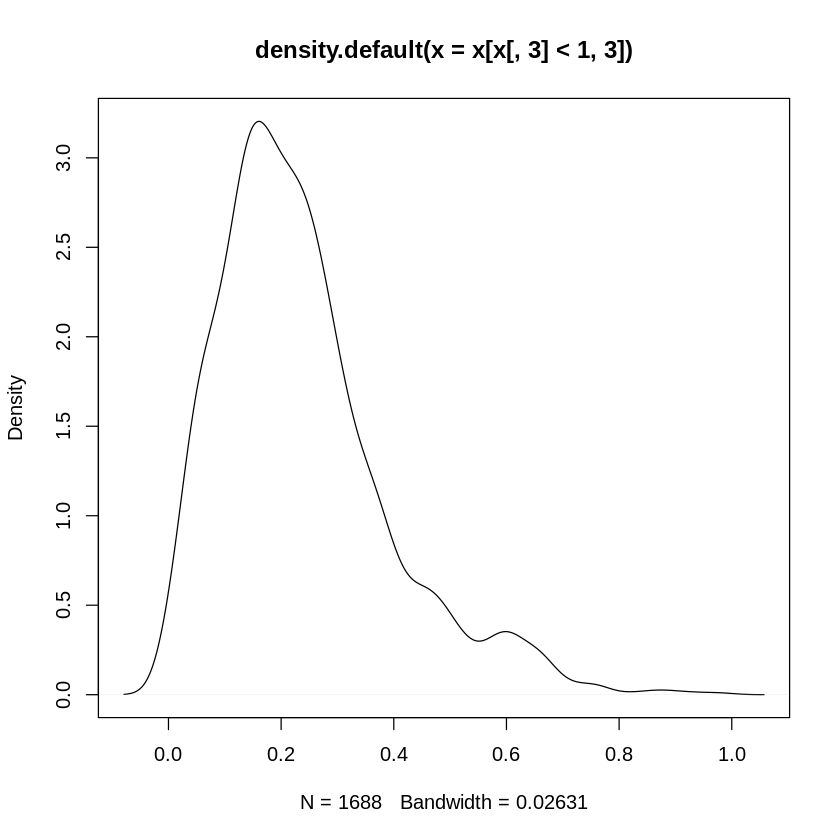

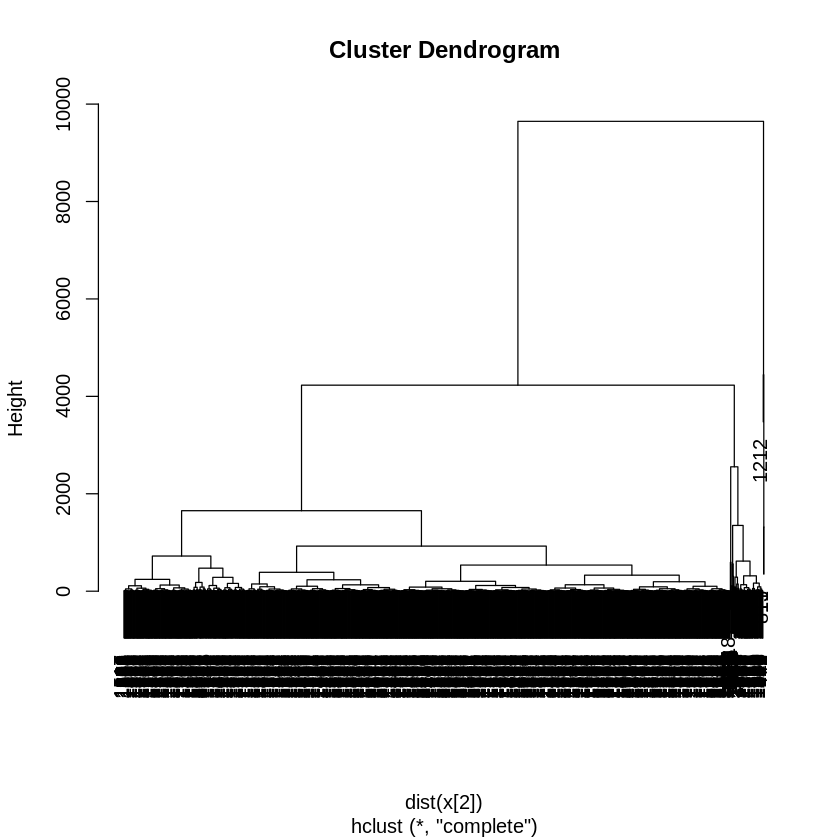

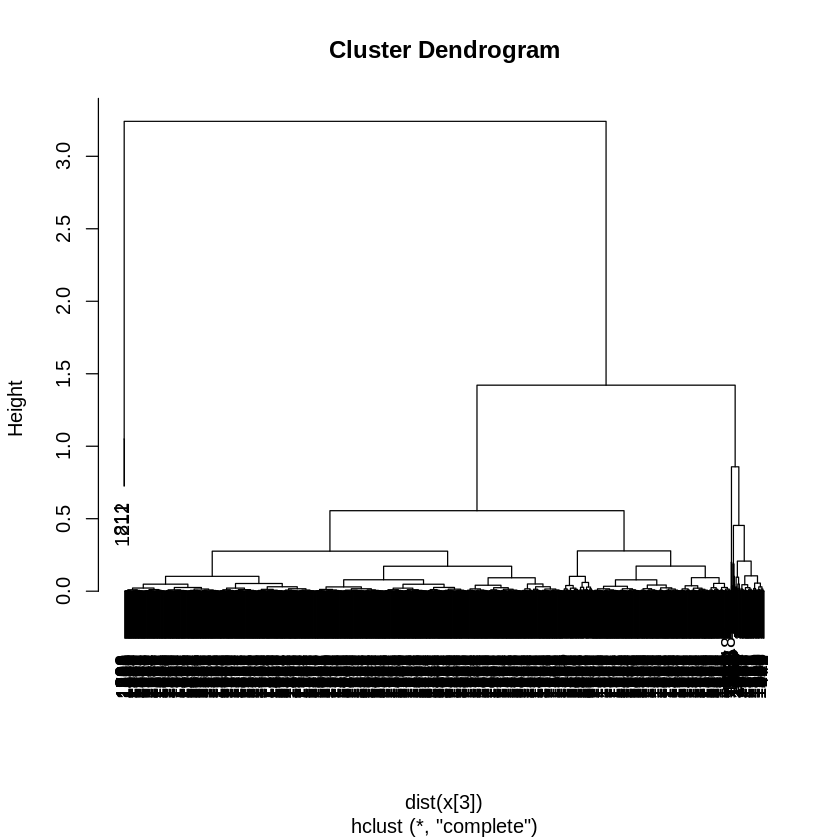

In [5]:
#clusters <- hclust(dist(iris[,3:4]))
#plot(clusters)

x <- read.csv("Intervals_122014_User_Avgs.csv", header = TRUE, sep = ",", quote = "\"",
         dec = ".", fill = TRUE, comment.char = "")
plot(density(x[x[,3] < 1,3]))
clusters <- hclust(dist(x[2]))
plot(clusters)
clusters <- hclust(dist(x[3]))
plot(clusters)